# Training

In [1]:
# Important libraries
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import random

# File paths
fp_notebooks_folder = "./"
fp_code_folder = "../"
fp_processed_folder = os.path.join(fp_code_folder, "../processed_data")
fp_downsampled_folder = os.path.join(fp_processed_folder, "downsampled")
fp_downsampled_dropna_file = os.path.join(fp_downsampled_folder, "dropna.csv")

# Check GPU is available
print(tf.config.list_physical_devices('GPU'))

# function to show df
def display_df(df):
    display(df.head())
    print("Shape:", df.shape)

2023-08-22 13:15:03.275206: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-22 13:15:03.709112: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-08-22 13:15:04.363620: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-22 13:15:04.376976: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-22 13:15:04.377130: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## Load Data

In [2]:
df = pd.read_csv(fp_downsampled_dropna_file, index_col=0)
df

,AE_Feature0 0,AE_Feature1 0,AE_Feature10 0,AE_Feature11 0,AE_Feature2 0,AE_Feature3 0,AE_Feature4 0,AE_Feature5 0,AE_Feature6 0,AE_Feature7 0,...,AE_Feature6 4,AE_Feature7 4,AE_Feature8 4,AE_Feature9 4,target,target_index,record,train,valid,test
0,0.07409,-0.144678,0.148505,0.548253,-0.061471,-0.104771,-0.068434,0.068132,-0.456306,0.0686,...,1.235942,0.0686,-0.018514,-0.639488,False,9,048n,True,False,False
1,0.07409,-0.605666,-0.073078,0.548253,-0.061471,-0.104771,-0.068434,0.068132,0.148160,0.0686,...,1.385429,0.0686,-0.208282,-0.772164,False,10,048n,True,False,False
2,0.07409,-0.433687,-0.073078,0.548253,-0.061471,-0.104771,-0.068434,0.068132,0.007932,0.0686,...,1.516270,0.0686,-0.114600,-0.789018,False,11,048n,True,False,False
3,0.07409,0.192730,-0.073078,0.548253,-0.061471,-0.104771,-0.068434,0.068132,0.275171,0.0686,...,2.146468,0.0686,-0.189079,-0.673252,False,12,048n,True,False,False
4,0.07409,-0.203023,-0.073078,0.548253,-0.061471,-0.104771,-0.068434,0.068132,1.235942,0.0686,...,1.890866,0.0686,0.201123,-0.632894,False,13,048n,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87777,0.07409,-1.272491,-0.073078,0.548253,-0.061471,-0.104771,-0.068434,0.068132,-0.284384,0.0686,...,-0.254645,0.0686,-0.345690,-0.429113,False,934,476n,True,False,False
87778,0.07409,-1.217027,-0.073078,0.548253,-0.061471,-0.104771,-0.068434,0.068132,-0.312994,0.0686,...,-0.112043,0.0686,-0.178136,-0.407217,False,935,476n,True,False,False
87779,0.07409,-1.197421,-0.073078,0.548253,-0.061471,-0.104771,-0.068434,0.068132,-0.321589,0.0686,...,-0.120870,0.0686,-0.170493,-0.385787,False,936,476n,True,False,False
87780,0.07409,-1.359967,-0.073078,0.548253,-0.061471,-0.104771,-0.068434,0.068132,-0.352035,0.0686,...,-0.277737,0.0686,-0.230259,-0.410766,False,937,476n,True,False,False


In [3]:
predictors = df.columns[:60].to_list()
print(predictors)

['AE_Feature0 0', 'AE_Feature1 0', 'AE_Feature10 0', 'AE_Feature11 0', 'AE_Feature2 0', 'AE_Feature3 0', 'AE_Feature4 0', 'AE_Feature5 0', 'AE_Feature6 0', 'AE_Feature7 0', 'AE_Feature8 0', 'AE_Feature9 0', 'AE_Feature0 1', 'AE_Feature1 1', 'AE_Feature10 1', 'AE_Feature11 1', 'AE_Feature2 1', 'AE_Feature3 1', 'AE_Feature4 1', 'AE_Feature5 1', 'AE_Feature6 1', 'AE_Feature7 1', 'AE_Feature8 1', 'AE_Feature9 1', 'AE_Feature0 2', 'AE_Feature1 2', 'AE_Feature10 2', 'AE_Feature11 2', 'AE_Feature2 2', 'AE_Feature3 2', 'AE_Feature4 2', 'AE_Feature5 2', 'AE_Feature6 2', 'AE_Feature7 2', 'AE_Feature8 2', 'AE_Feature9 2', 'AE_Feature0 3', 'AE_Feature1 3', 'AE_Feature10 3', 'AE_Feature11 3', 'AE_Feature2 3', 'AE_Feature3 3', 'AE_Feature4 3', 'AE_Feature5 3', 'AE_Feature6 3', 'AE_Feature7 3', 'AE_Feature8 3', 'AE_Feature9 3', 'AE_Feature0 4', 'AE_Feature1 4', 'AE_Feature10 4', 'AE_Feature11 4', 'AE_Feature2 4', 'AE_Feature3 4', 'AE_Feature4 4', 'AE_Feature5 4', 'AE_Feature6 4', 'AE_Feature7 4', 'AE

In [4]:
pred_col = "target"

In [5]:
# Make train, validation and test sets
def train_valid_test_split(df):
    df_train, df_valid, df_test = df[df["train"]], df[df["valid"]], df[df["test"]]
    train_count, valid_count, test_count = (
        df_train["target"].value_counts(), df_valid["target"].value_counts(), 
        df_test["target"].value_counts()
    )
    train_count.name, valid_count.name, test_count.name = "train", "valid", "test"
    
    display(pd.concat([train_count, valid_count, test_count], axis=1))
    return df_train, df_valid, df_test

df_train, df_valid, df_test = train_valid_test_split(df)

,train,valid,test
target,,,
False,50643,12181,16031
True,5355,1346,2226


## Model Definition

In [11]:
def set_seed(seed):
    tf.config.experimental.enable_op_determinism()
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.keras.utils.set_random_seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)

def display_history(history, show_acc=False):
    if show_acc:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6, 2.5))
        axes[0].plot(history.history['loss'])
        axes[0].plot(history.history['val_loss'])
        axes[0].set_title('Model Loss')
        axes[0].set_ylabel('Loss')
        axes[0].set_xlabel('Epoch')
        axes[0].legend(['Train', 'Val'], loc='upper left')
        axes[1].plot(history.history['accuracy'])
        axes[1].plot(history.history['val_accuracy'])
        axes[1].set_title('Model Accuracy')
        axes[1].set_ylabel('Accuracy')
        axes[1].set_xlabel('Epoch')
        axes[1].legend(['Train', 'Val'], loc='upper left')
        axes[2].plot(history.history['f1_score'])
        axes[2].plot(history.history['val_f1_score'])
        axes[2].set_title('Model F1 Score')
        axes[2].set_ylabel('F1 Score')
        axes[2].set_xlabel('Epoch')
        axes[2].legend(['Train', 'Val'], loc='upper left')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 2.5))
        axes.plot(history.history['loss'])
        axes.plot(history.history['val_loss'])
        axes.set_title('Model Loss')
        axes.set_ylabel('Loss')
        axes.set_xlabel('Epoch')
        axes.legend(['Train', 'Val'], loc='upper left')
    plt.tight_layout()
    plt.show()

class AE_Classifier:
    def __init__(self, width, predictors, num_class):
        from keras.layers import Dense
        self.predictors = predictors
        self.num_predictors = len(self.predictors)
        self.num_class = num_class
        self.width = width
        
        # Instantiate model layers
        self.inputs = tf.keras.Input(shape=(self.num_predictors,))
        self.encoder = Dense(
            self.width, activation=tf.keras.layers.LeakyReLU(alpha=0.3), name="encoder", kernel_regularizer="l2")
        self.decoder = Dense(self.num_predictors, name="decoder")
        self.classifier = Dense(1, activation="sigmoid", name="classifier")
    
    # Smote is external
    def train_classifier(
        self, train_X, train_y, val_X, val_y, batch_size, max_epochs, verbose, patience):
        from tensorflow.keras.callbacks import EarlyStopping
        # Define classifier
        pred = self.encoder(self.inputs)
        pred = self.classifier(pred)
        self.predictor = tf.keras.Model(inputs=self.inputs, outputs=pred, name="classifier_model")
        # Train classifier
        self.predictor.compile(
            loss='binary_crossentropy',
            optimizer=tf.keras.optimizers.Adam(),
            metrics=["accuracy", tf.keras.metrics.F1Score(name='f1_score')]
        )
        es = EarlyStopping(
            monitor='val_loss', mode='min', verbose=1, patience=patience, restore_best_weights=True)
        # Train with class weights and no SMOTE
#         from sklearn.utils import class_weight
#         class_weights = class_weight.compute_class_weight(
#             'balanced', classes=np.unique(train_y), y=train_y)
#         class_weights_dict = dict(enumerate(class_weights))
#         print(class_weights_dict)
        self.predictor_history = self.predictor.fit(
            train_X, train_y, 
            epochs=max_epochs, 
            validation_data=(val_X, val_y),
            verbose=verbose,
            batch_size=batch_size,
            callbacks=[es],
#             class_weight=class_weights_dict
        )
        print("- Classifier Training History")
        display_history(self.predictor_history, show_acc=True)
        best_index = np.argmin(self.predictor_history.history['val_loss'])
        
        return (
            self.predictor_history.history['val_loss'][best_index], 
            self.predictor_history.history['val_accuracy'][best_index],
            self.predictor_history.history['val_f1_score'][best_index][0],
            best_index
        )
        
    def train_decoder(
        self, train_X, val_X, batch_size, max_epochs, verbose, patience):
        from tensorflow.keras.callbacks import EarlyStopping
        # Define AE
        self.encoder.trainable=False # Freeze weights
        x = self.encoder(self.inputs)
        x = self.decoder(x)
        self.ae = tf.keras.Model(inputs=self.inputs, outputs=x, name="ae_model")
        # Train AE
        self.ae.compile(
            loss="mse",
            optimizer=tf.keras.optimizers.Adam()
        )
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=patience,restore_best_weights=True)
        self.ae_history = self.ae.fit(
            train_X, train_X, 
            epochs=max_epochs, 
            validation_data=(val_X, val_X),
            verbose=verbose,
            batch_size=batch_size,
            callbacks=[es]
        )
        print("- Autoencoder Training History")
        display_history(self.ae_history)
        return min(self.ae_history.history['val_loss'])

    def predict(self, inputs, with_mae=False):
        # Encode
        encoder_output = self.encoder(inputs)

        # Reconstruct
        decoder_output = self.decoder(encoder_output).numpy()

        # Calculate reconstruction error
        mae = tf.math.abs(decoder_output - inputs)
        mae = tf.reduce_mean(mae, [-1]).numpy()

        # Get forecast result
        classifier_output = self.classifier(encoder_output).numpy()

        if with_mae:
            return classifier_output, mae
        else:
            return classifier_output
        
def save_model(model, name, fp_checkpoints, override=False):
    import pickle
    model_folder = os.path.join(fp_checkpoints, name)
    if os.path.exists(model_folder):
        print("Model checkpoint already exists!")
        if not override:
            return
    else:
        os.makedirs(model_folder)
    
    # Save Parameters
    parameters_to_save = dict(
        predictors = model.predictors,
        num_class = model.num_class,
        width = model.width
    )   
    parameter_filename = os.path.join(fp_checkpoints, name, "parameters.pickle")
    with open(parameter_filename, 'wb') as handle:
        pickle.dump(parameters_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    # Save Model
    inputs = model.inputs
    encoder_output = model.encoder(inputs)
    decoder_output = model.decoder(encoder_output)
    classifier_output = model.classifier(encoder_output)
    model = tf.keras.Model(inputs, [classifier_output, decoder_output])
    model_filename = os.path.join(fp_checkpoints, name, "model.h5")
    model.save(model_filename)
    print("Model saved!")

def load_model(name, fp_checkpoints): 
    import pickle
    model_folder = os.path.join(fp_checkpoints, name)
    parameter_filename = os.path.join(fp_checkpoints, name, "parameters.pickle")
    model_filename = os.path.join(fp_checkpoints, name, "model.h5")
    
    if not os.path.exists(model_folder):
        print("model checkpoint does not exist!")
        return
    model = tf.keras.models.load_model(model_filename)
    with open(parameter_filename, 'rb') as handle:
        parameters = pickle.load(handle)
    
    ae_classifier = AE_Classifier(
        parameters["width"], parameters["predictors"], parameters["num_class"])
    ae_classifier.encoder = model.get_layer("encoder")
    ae_classifier.decoder = model.get_layer("decoder")
    ae_classifier.classifier = model.get_layer("classifier")
    
    return ae_classifier

def model_tuning(
    width_list, predictors, pred_col, num_class, train_df, valid_df, seed,
    batch_size=128, max_epochs=5000, verbose=1, patience=10):
    from imblearn.over_sampling import SMOTE
    train_X, train_y = train_df[predictors].values.astype('float32'), train_df[pred_col].values.astype('float32')
    valid_X, valid_y = valid_df[predictors].values.astype('float32'), valid_df[pred_col].values.astype('float32')
    loss_list = []
    acc_list = []
    epoch_list = []
    f1_list = []
    time_spent_list = []
    for width in tqdm(width_list):
        set_seed(seed)
        classifier = AE_Classifier(width, predictors, num_class)
        start = time.time()
        # Oversample
        oversample = SMOTE()
        train_X_over, train_y_over = oversample.fit_resample(train_X, train_y)
        # Train classifier with SMOTE
        val_loss, val_acc, val_f1, best_epoch = classifier.train_classifier(
            train_X_over, train_y_over, valid_X, valid_y, 
            batch_size, max_epochs, verbose, patience)
        # Train without SMOTE
#         val_loss, val_acc, val_f1, best_epoch = classifier.train_classifier(
#             train_X, train_y, valid_X, valid_y, 
#             batch_size, max_epochs, verbose, patience)
        # Train decoder (Tune by classifier loss only)
#             classifier.train_decoder(
#                 fold_train_X_over, fold_val_X, batch_size, max_epochs, verbose, patience)
        loss_list.append(val_loss)
        acc_list.append(val_acc)
        f1_list.append(val_f1)
        epoch_list.append(best_epoch)
        
        time_spent_list.append(time.time()-start)
    tuning_df = pd.DataFrame(
        {"width": width_list, "loss": loss_list, "acc": acc_list, "f1": f1_list, "epochs": epoch_list,"time/s": time_spent_list})
    best_width_idx = tuning_df['loss'].idxmin()
    best_width = tuning_df['width'].tolist()[best_width_idx]
    return tuning_df, best_width

def model_training(
    width, predictors, pred_col, num_class, train_df, valid_df, seed,
    batch_size=128, max_epochs=5000, verbose=1, patience=10):
    from tqdm import tqdm
    import time
    from imblearn.over_sampling import SMOTE
    set_seed(seed)
    
    # Get data
    train_X, train_y = train_df[predictors].values.astype('float32'), train_df[pred_col].values.astype('float32')
    valid_X, valid_y = valid_df[predictors].values.astype('float32'), valid_df[pred_col].values.astype('float32')
    
    # Train classifier
    ae_classifier = AE_Classifier(width, predictors, num_class)

    # Oversample
    oversample = SMOTE()
    train_X_over, train_y_over = oversample.fit_resample(train_X, train_y)
    print(pd.Series(train_y_over).value_counts())
    
    start = time.time()
    # Train classifier
    valid_loss_classifier, valid_acc, valid_f1, best_epoch = ae_classifier.train_classifier(
        train_X_over, train_y_over, valid_X, valid_y, 
        batch_size, max_epochs, verbose, patience)
    
    # Train decoder
    valid_loss_ae = ae_classifier.train_decoder(
        train_X_over, valid_X, batch_size, max_epochs, verbose, patience)
    
    print(f"Training took {time.time()-start}s.")
    return ae_classifier

## Model Tuning

### With Only Mean Predictors

In [7]:
predictors_only_mean = [pred for pred in predictors if "_mean" in pred]
print(len(predictors_only_mean), "Predictors:", predictors_only_mean)

0 Predictors: []


In [8]:
tuning_df, best_width = model_tuning(
    width_list=[64, 128, 256, 512, 1024, 1536], predictors=predictors_only_mean, pred_col=pred_col, 
    num_class=2, train_df=df_train, valid_df=df_valid, seed=2023,
    batch_size=128, max_epochs=10000, verbose=1, patience=20
)

  0%|                                                     | 0/6 [00:00<?, ?it/s]


ValueError: Found array with 0 feature(s) (shape=(55998, 0)) while a minimum of 1 is required by SMOTE.

In [ ]:
tuning_df

### With All Predictors

  0%|                                                     | 0/6 [00:00<?, ?it/s]

Epoch 1/10000
50/50 [==============================] - 1s 4ms/step - loss: 1.1680 - accuracy: 0.5900 - f1_score: 0.6667 - val_loss: 1.0091 - val_accuracy: 0.6593 - val_f1_score: 0.1810
Epoch 2/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.9235 - accuracy: 0.6211 - f1_score: 0.6667 - val_loss: 0.8555 - val_accuracy: 0.6186 - val_f1_score: 0.1810
Epoch 3/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.7864 - accuracy: 0.6532 - f1_score: 0.6667 - val_loss: 0.7682 - val_accuracy: 0.5935 - val_f1_score: 0.1810
Epoch 4/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.7086 - accuracy: 0.6773 - f1_score: 0.6667 - val_loss: 0.7256 - val_accuracy: 0.5885 - val_f1_score: 0.1810
Epoch 5/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.6917 - f1_score: 0.6667 - val_loss: 0.7068 - val_accuracy: 0.5844 - val_f1_score: 0.1810
Epoch 6/10000
50/50 [==============================] - 0s 2ms/step - loss: 

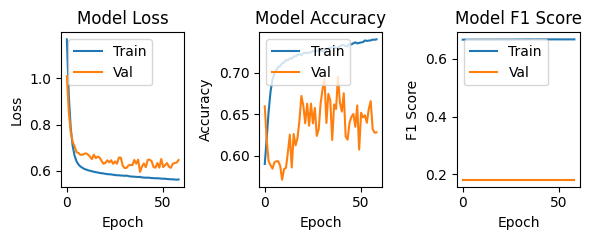

 17%|███████▌                                     | 1/6 [00:06<00:31,  6.35s/it]

Epoch 1/10000
50/50 [==============================] - 1s 4ms/step - loss: 1.2567 - accuracy: 0.6045 - f1_score: 0.6667 - val_loss: 1.0339 - val_accuracy: 0.6108 - val_f1_score: 0.1810
Epoch 2/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.8987 - accuracy: 0.6556 - f1_score: 0.6667 - val_loss: 0.8235 - val_accuracy: 0.5943 - val_f1_score: 0.1810
Epoch 3/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.7343 - accuracy: 0.6799 - f1_score: 0.6667 - val_loss: 0.7359 - val_accuracy: 0.5950 - val_f1_score: 0.1810
Epoch 4/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.6939 - f1_score: 0.6667 - val_loss: 0.6985 - val_accuracy: 0.5787 - val_f1_score: 0.1810
Epoch 5/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.7011 - f1_score: 0.6667 - val_loss: 0.6917 - val_accuracy: 0.5840 - val_f1_score: 0.1810
Epoch 6/10000
50/50 [==============================] - 0s 2ms/step - loss: 

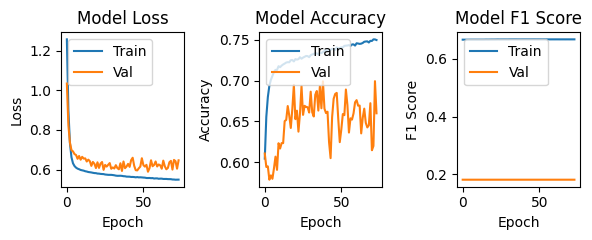

 33%|███████████████                              | 2/6 [00:14<00:28,  7.15s/it]

Epoch 1/10000
50/50 [==============================] - 1s 4ms/step - loss: 1.2838 - accuracy: 0.6215 - f1_score: 0.6667 - val_loss: 1.0091 - val_accuracy: 0.5825 - val_f1_score: 0.1810
Epoch 2/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.8290 - accuracy: 0.6748 - f1_score: 0.6667 - val_loss: 0.7815 - val_accuracy: 0.5848 - val_f1_score: 0.1810
Epoch 3/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.6942 - f1_score: 0.6667 - val_loss: 0.7125 - val_accuracy: 0.5808 - val_f1_score: 0.1810
Epoch 4/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.7037 - f1_score: 0.6667 - val_loss: 0.6924 - val_accuracy: 0.5695 - val_f1_score: 0.1810
Epoch 5/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.7093 - f1_score: 0.6668 - val_loss: 0.6820 - val_accuracy: 0.5774 - val_f1_score: 0.1810
Epoch 6/10000
50/50 [==============================] - 0s 2ms/step - loss: 

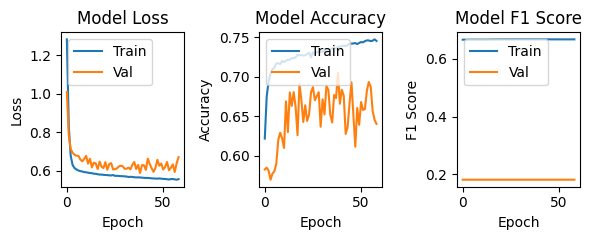

 50%|██████████████████████▌                      | 3/6 [00:20<00:20,  6.76s/it]

Epoch 1/10000
50/50 [==============================] - 1s 4ms/step - loss: 1.2317 - accuracy: 0.6336 - f1_score: 0.6667 - val_loss: 0.9168 - val_accuracy: 0.5832 - val_f1_score: 0.1810
Epoch 2/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.7347 - accuracy: 0.6898 - f1_score: 0.6667 - val_loss: 0.7165 - val_accuracy: 0.5843 - val_f1_score: 0.1810
Epoch 3/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.7014 - f1_score: 0.6667 - val_loss: 0.6937 - val_accuracy: 0.5834 - val_f1_score: 0.1810
Epoch 4/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.6111 - accuracy: 0.7081 - f1_score: 0.6668 - val_loss: 0.6946 - val_accuracy: 0.5456 - val_f1_score: 0.1810
Epoch 5/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.6029 - accuracy: 0.7126 - f1_score: 0.6668 - val_loss: 0.6777 - val_accuracy: 0.5962 - val_f1_score: 0.1810
Epoch 6/10000
50/50 [==============================] - 0s 2ms/step - loss: 

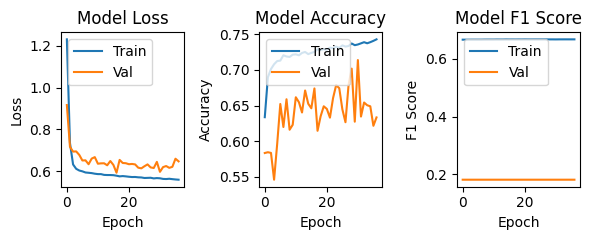

 67%|██████████████████████████████               | 4/6 [00:24<00:11,  5.79s/it]

Epoch 1/10000
50/50 [==============================] - 1s 4ms/step - loss: 1.1501 - accuracy: 0.6422 - f1_score: 0.6667 - val_loss: 0.7980 - val_accuracy: 0.5970 - val_f1_score: 0.1810
Epoch 2/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.6948 - f1_score: 0.6667 - val_loss: 0.6758 - val_accuracy: 0.5965 - val_f1_score: 0.1810
Epoch 3/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.7056 - f1_score: 0.6668 - val_loss: 0.6788 - val_accuracy: 0.5788 - val_f1_score: 0.1810
Epoch 4/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.6046 - accuracy: 0.7097 - f1_score: 0.6668 - val_loss: 0.7010 - val_accuracy: 0.5601 - val_f1_score: 0.1810
Epoch 5/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.7144 - f1_score: 0.6668 - val_loss: 0.6650 - val_accuracy: 0.6260 - val_f1_score: 0.1810
Epoch 6/10000
50/50 [==============================] - 0s 2ms/step - loss: 

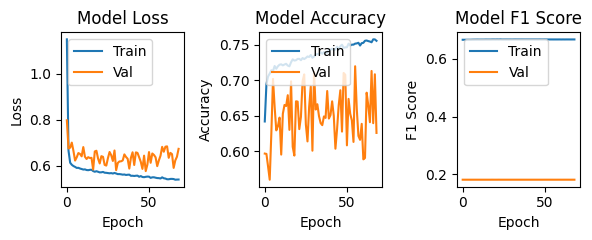

 83%|█████████████████████████████████████▌       | 5/6 [00:31<00:06,  6.32s/it]

Epoch 1/10000
50/50 [==============================] - 1s 4ms/step - loss: 1.0611 - accuracy: 0.6564 - f1_score: 0.6667 - val_loss: 0.7475 - val_accuracy: 0.5889 - val_f1_score: 0.1810
Epoch 2/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.6326 - accuracy: 0.7013 - f1_score: 0.6667 - val_loss: 0.6467 - val_accuracy: 0.6208 - val_f1_score: 0.1810
Epoch 3/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.7059 - f1_score: 0.6668 - val_loss: 0.6531 - val_accuracy: 0.6292 - val_f1_score: 0.1810
Epoch 4/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.7104 - f1_score: 0.6670 - val_loss: 0.6557 - val_accuracy: 0.6318 - val_f1_score: 0.1810
Epoch 5/10000
50/50 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.7159 - f1_score: 0.6673 - val_loss: 0.6486 - val_accuracy: 0.6605 - val_f1_score: 0.1810
Epoch 6/10000
50/50 [==============================] - 0s 2ms/step - loss: 

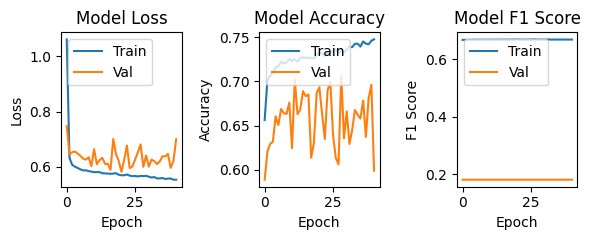

100%|█████████████████████████████████████████████| 6/6 [00:36<00:00,  6.11s/it]


In [12]:
tuning_df, best_width = model_tuning(
    width_list=[64, 128, 256, 512, 1024, 1536], predictors=predictors, pred_col=pred_col, 
    num_class=2, train_df=df_train, valid_df=df_valid, seed=2023,
    batch_size=2048, max_epochs=10000, verbose=1, patience=20
)

In [13]:
tuning_df

,width,loss,acc,f1,epochs,time/s
0,64,0.595768,0.695128,0.180999,38,6.334752
1,128,0.589247,0.689140,0.180999,53,7.704620
2,256,0.586997,0.704739,0.180999,38,6.295746
3,512,0.592375,0.674059,0.180999,16,4.298139
4,1024,0.576918,0.710579,0.180999,48,7.258166
5,1536,0.582227,0.693206,0.180999,20,4.723845


In [ ]:
ae_classifier = model_training(
    width=best_width, predictors=predictors, pred_col=pred_col, num_class=2, 
    train_df=df_train, valid_df = df_valid, seed=2023,
    batch_size=2048, max_epochs=5000, verbose=1, patience=20
)

In [9]:
def model_evaluation(ae_classifier, predictors, pred_col, test_df):
    import sklearn
    test_X, test_y = test_df[predictors].values.astype('float32'), test_df[pred_col].values.astype('float32')
   
    test_y_pred = ae_classifier.predict(inputs=test_X, with_mae=True)

    bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    
    test_loss_classifier = bce(test_y, test_y_pred[0].flatten()).numpy()
    test_acc = tf.keras.metrics.binary_accuracy(test_y, test_y_pred[0].flatten())
    test_f1 = sklearn.metrics.f1_score(test_y, test_y_pred[0].flatten()>0.5)
    
    test_loss_ae = np.mean(test_y_pred[1])
    
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    cm = confusion_matrix(test_y, test_y_pred[0].flatten()>0.5, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot()
    plt.show()
    
    
    print(f"Test Classifier Accuracy: {test_acc}")
    print(f"Test Classifier F1: {test_f1}")
    print(f"Test Classifier Loss: {test_loss_classifier}")
    print(f"Test Autoencoder Loss: {test_loss_ae}")
    
    return test_loss_classifier, test_acc, test_loss_ae
model_evaluation(ae_classifier, predictors, pred_col, df_test)

NameError: name 'ae_classifier' is not defined